# Test for Calculating Room Acoustic Parameter
- using module 'pyRoomAcoustic'


In [1]:
'''
# 라이브러리 정의
 - 시스템 라이브러리
 - 오디오 관련 라이브러리
 - 연산 및 Plot 관련 라이브러리 
 - 샤용자 라이브러리
'''

# Import Systems 
import struct
import io
import os
import sys
import time

# Import Audio
import wave
import pyaudio
#import librosa

import numpy as np
from scipy.io import wavfile
import scipy.io
import matplotlib.pyplot as plt

# User Libraries
import pyOssWavfile
import pyRoomAcoustic



In [2]:
# Path of audiofiles folder
audio_dir = os.path.join(os.getcwd(), 'audiofiles')

# Define wave file name text to open
# Path + wave file name

wav_fname = os.path.join(audio_dir, 'TyndallBruceMonument.wav')

#wav_fname = os.path.join(audio_dir, 'ElvedenHallMarbleHall.wav')
#wav_fname = os.path.join(audio_dir, 'EmptyApartmentBedroom.wav')
#wav_fname = os.path.join(audio_dir, 'FalklandPalaceRoyalTennisCourt.wav')
#wav_fname = os.path.join(audio_dir, 'InsidePiano.wav')
#wav_fname = os.path.join(audio_dir, 'MaesHowe.wav')
#wav_fname = os.path.join(audio_dir, 'SportsCentreUniversityOfYork.wav')
#wav_fname = os.path.join(audio_dir, 'StairwayUniversityOfYork.wav')
#wav_fname = os.path.join(audio_dir, 'StAndrewsChurch.wav')

(18, 3, 2, 44100, 352800, 8, 32) 1693440
Audio Format = 3
Number of Channel = 2
Sampling Frequency = 44100
Byte Rate = 352800
Block Align = 8
Bits per Sample = 32
Time = 4.8 sec
Length =  211680


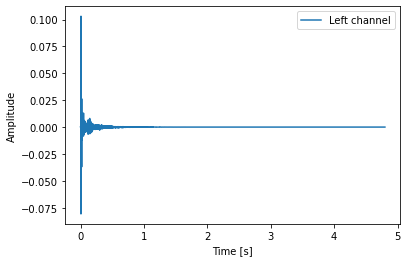

In [5]:
# Read .wav file using pyOssWavfile.read() & Extract .wav file header information

ossWav_fmt_chunk, ossWav_data, ossWav_length = pyOssWavfile.read(wav_fname)

print(ossWav_fmt_chunk, ossWav_length)

ossWav_format, ossWav_numch, ossWav_fs, ossWav_byterate, ossWav_blockalign, ossWav_bitdepth = pyOssWavfile.extractWavFmtChunk(ossWav_fmt_chunk)

ossWav_time = ossWav_data.shape[0] / ossWav_fs

print("Audio Format =", ossWav_format)
print("Number of Channel =", ossWav_numch)
print("Sampling Frequency =", ossWav_fs)
print("Byte Rate =", ossWav_byterate)       # 일종의 Checksum 
print("Block Align =", ossWav_blockalign)
print("Bits per Sample =", ossWav_bitdepth)
print("Time =", ossWav_time, "sec")
print("Length = ", ossWav_data.shape[0])

# Plot loaded wave file
plot_time = np.linspace(0., ossWav_time, ossWav_data.shape[0])

plt.plot(plot_time, ossWav_data[:, 0], label="Left channel")
#plt.plot(plot_time, ossWav_data[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()



(211680,)


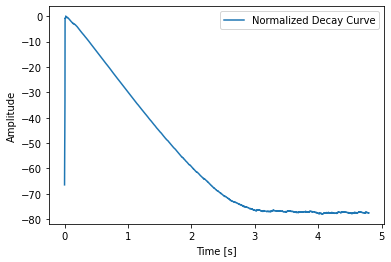

(0,)


ValueError: Inputs must not be empty.

In [4]:

ossWav_decaycurve = pyRoomAcoustic.decayCurve(ossWav_data[:,0], ossWav_time, ossWav_fs)

print (ossWav_decaycurve.shape)

# Plot Normalized Decay Curve
plot_time = np.linspace(0., ossWav_time, ossWav_decaycurve.shape[0])

plt.plot(plot_time, ossWav_decaycurve, label="Normalized Decay Curve")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

ossWav_rt60, ossWav_nonLin = pyRoomAcoustic.T60(ossWav_decaycurve, ossWav_fs) 
